# Compare Detector Level Distributions by Year (199X/1994)



In [62]:
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

import modplot

In [63]:
import matplotlib
print(matplotlib.__version__)

3.1.3


In [64]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.ioff()

In [65]:
# location of the data
aleph_path = '/callisto/ALEPH'
# distributions to loop over
detectorDists = {'Thrust':[],
                 '1-Thrust':[],
                 'log(1-Thrust)':[],
                }

dists = copy.deepcopy(detectorDists)
for key in detectorDists.keys():
    dists[key+'_BeforeEventSelection'] = []
    dists[key+'_NotPassingEventSelection'] = []
    dists[key+'_PassingEventSelection'] = []
    dists.pop(key)
detectorDists = dists

# LEP years to loop over
years = ['1992','1993','1994','1995']
years_MC = ['1994']
# Event selections to apply
eSels = ['passesNTupleAfterCut',
         'passesTotalChgEnergyMin', 
         'passesNTrkMin', 
         'passesNeuNch',
         'passesSTheta']

In [66]:
# Load the data

for year in years:
    data_file = uproot.open(os.path.join(aleph_path, 'LEP1Data{}_recons_aftercut-MERGED.root'.format(year)))
    event_mask = np.ones(len(data_file['t']['EventNo'])) 
    for eSel in eSels:
        event_mask *= data_file['t'][eSel].array() 
        
    for key in detectorDists.keys():
        
        # Determine which distribution and selection to find
        dist, whichSel = key.split("_")[0], key.split("_")[-1]
       
        # Determine the event mask
        if 'BeforeEventSelection' in key:
            e_mask = np.ones(len(data_file['t']['EventNo']))
        elif 'NotPassingEventSelection' in key:
            e_mask = (np.array(event_mask)+1)%2
        elif 'PassingEventSelection' in key:
            e_mask = event_mask
        e_mask = np.array(e_mask).astype(bool)
    
        # Fill the data dictionary 
        if dist == 'Thrust':
            detectorDists[key].append(data_file['t'][dist].array()[e_mask])
        elif dist == '1-Thrust':
            detectorDists[key].append((1 - data_file['t']['Thrust'].array())[e_mask])
        elif dist == 'log(1-Thrust)':
            detectorDists[key].append(np.log(1 - data_file['t']['Thrust'].array())[e_mask])       

In [67]:
# Load the MC

for year in years_MC:
    data_file = uproot.open(os.path.join(aleph_path, 'alephMCRecoAfterCutPaths_{}.root'.format(year)))
    event_mask = np.ones(len(data_file['t']['EventNo'])) 
    for eSel in eSels:
        event_mask *= data_file['t'][eSel].array() 
        
    for key in detectorDists.keys():
        
        # Determine which distribution and selection to find
        dist, whichSel = key.split("_")[0], key.split("_")[-1]
       
        # Determine the event mask
        if 'BeforeEventSelection' in key:
            e_mask = np.ones(len(data_file['t']['EventNo']))
        elif 'NotPassingEventSelection' in key:
            e_mask = (np.array(event_mask)+1)%2
        elif 'PassingEventSelection' in key:
            e_mask = event_mask
        e_mask = np.array(e_mask).astype(bool)
    
        # Fill the data dictionary 
        if dist == 'Thrust':
            detectorDists[key].append(data_file['t'][dist].array()[e_mask])
        elif dist == '1-Thrust':
            detectorDists[key].append((1 - data_file['t']['Thrust'].array())[e_mask])
        elif dist == 'log(1-Thrust)':
            detectorDists[key].append(np.log(1 - data_file['t']['Thrust'].array())[e_mask])     

In [68]:
for job in detectorDists:
    print(job)
    print(len(detectorDists[job]))

Thrust_BeforeEventSelection
5
Thrust_NotPassingEventSelection
5
Thrust_PassingEventSelection
5
1-Thrust_BeforeEventSelection
5
1-Thrust_NotPassingEventSelection
5
1-Thrust_PassingEventSelection
5
log(1-Thrust)_BeforeEventSelection
5
log(1-Thrust)_NotPassingEventSelection
5
log(1-Thrust)_PassingEventSelection
5


In [99]:
# histogram settings 
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
colors = ['purple','purple','purple','purple','black']

obs = {}

obs.setdefault('Thrust', {}).update({
    'func': lambda dset, ptype: dset[ptype + '_thrusts'],
    'nbins_det': 50, 'nbins_mc': 50,
    'yscale': 'log',
    'xlim': (0.5, 1.0), 'ylim': (10**-4.5, 20), 'ylim_ratio': (0.7, 1.3),
    'ytick_ratio_step': 0.15,
    'xlabel': r'Thrust T', 'symbol': r'T',
    'ylabel': r'Normalized Cross Section', 'ylabel_ratio': 'Ratio to\nALEPH',
    'stamp_xy': (0.53, 0.6),
    'legend_loc': 'lower right', 'legend_ncol': 1
})

obs.setdefault('1-Thrust', {}).update({
    'func': lambda dset, ptype: dset[ptype + '_thrusts'],
    'nbins_det': 50, 'nbins_mc': 50,
    'yscale': 'log',
    'xlim': (0, 0.5), 'ylim': (10**-4.5, 20), 'ylim_ratio': (0.7, 1.3),
    'ytick_ratio_step': 0.15,
    'xlabel': r'$1-\tau$', 'symbol': r'$\tau$',
    'ylabel': r'Normalized Cross Section', 'ylabel_ratio': 'Ratio to\nALEPH',
    'stamp_xy': (0.05, 0.6),
    'legend_loc': 'lower left', 'legend_ncol': 1
})

obs.setdefault('log(1-Thrust)', {}).update({
    'func': lambda dset, ptype: dset[ptype + '_thrusts'],
    'nbins_det': 55, 'nbins_mc': 55,
    'yscale': 'log',
    'xlim': (-11,0), 'ylim': (10**-6, 1), 'ylim_ratio': (0.7, 1.3),
    'ytick_ratio_step': 0.15,
    'xlabel': r'$\log\left(1-\tau\right)$', 'symbol': r'$\tau$',
    'ylabel': r'Normalized Cross Section', 'ylabel_ratio': 'Ratio to\nALEPH',
    'stamp_xy': (0.1, 0.9),
    'legend_loc': (0.45,0.1), 'legend_ncol': 1
})

# calculate quantities to be stored in obs
for obkey,ob in obs.items():
    
    # setup bins
    ob['bins_det'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_det']+1)
    ob['bins_mc'] = np.linspace(ob['xlim'][0], ob['xlim'][1], ob['nbins_mc']+1)
    ob['midbins_det'] = (ob['bins_det'][:-1] + ob['bins_det'][1:])/2
    ob['midbins_mc'] = (ob['bins_mc'][:-1] + ob['bins_mc'][1:])/2
    ob['binwidth_det'] = ob['bins_det'][1] - ob['bins_det'][0]
    ob['binwidth_mc'] = ob['bins_mc'][1] - ob['bins_mc'][0]
    

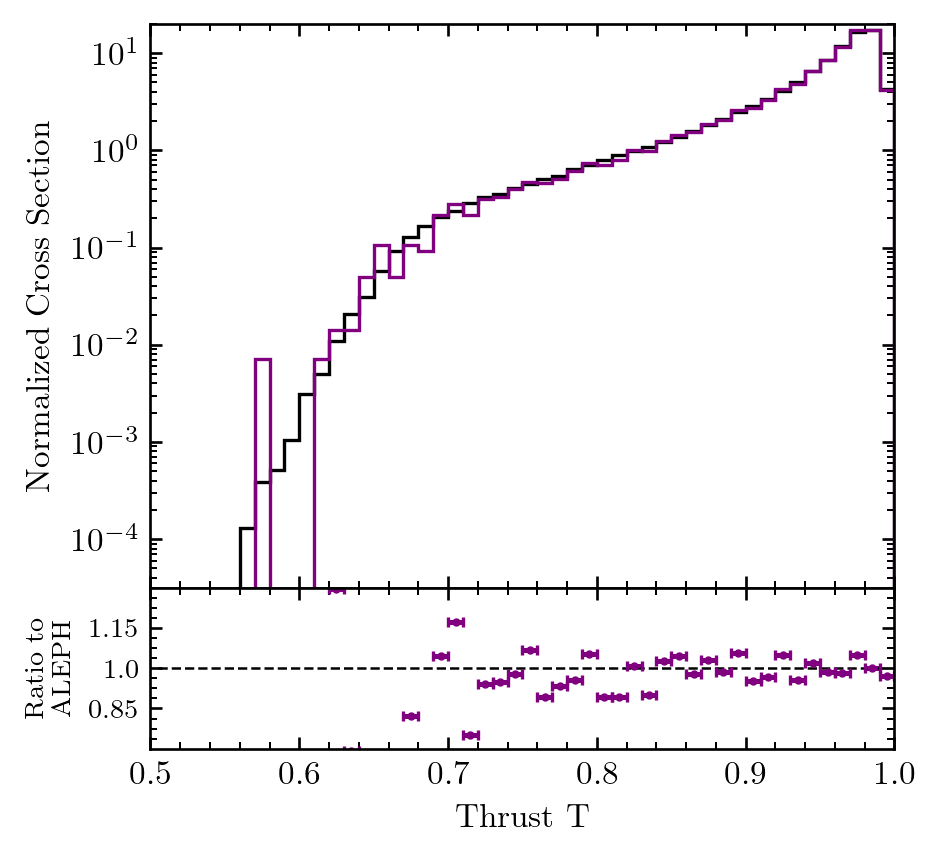

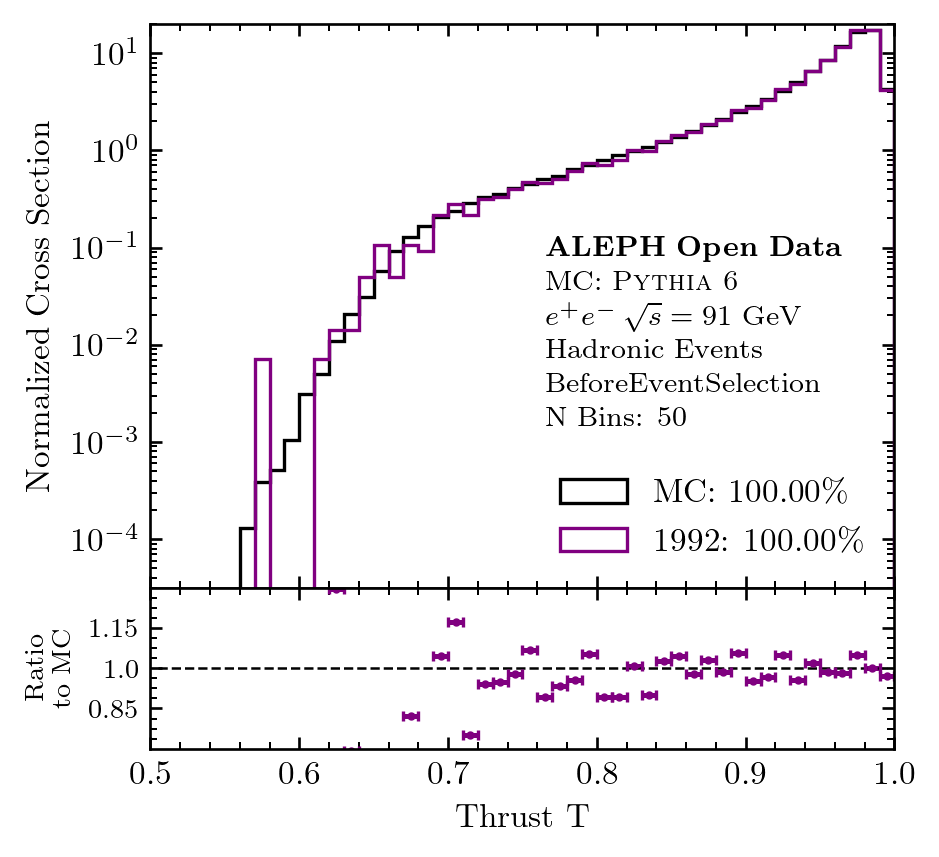

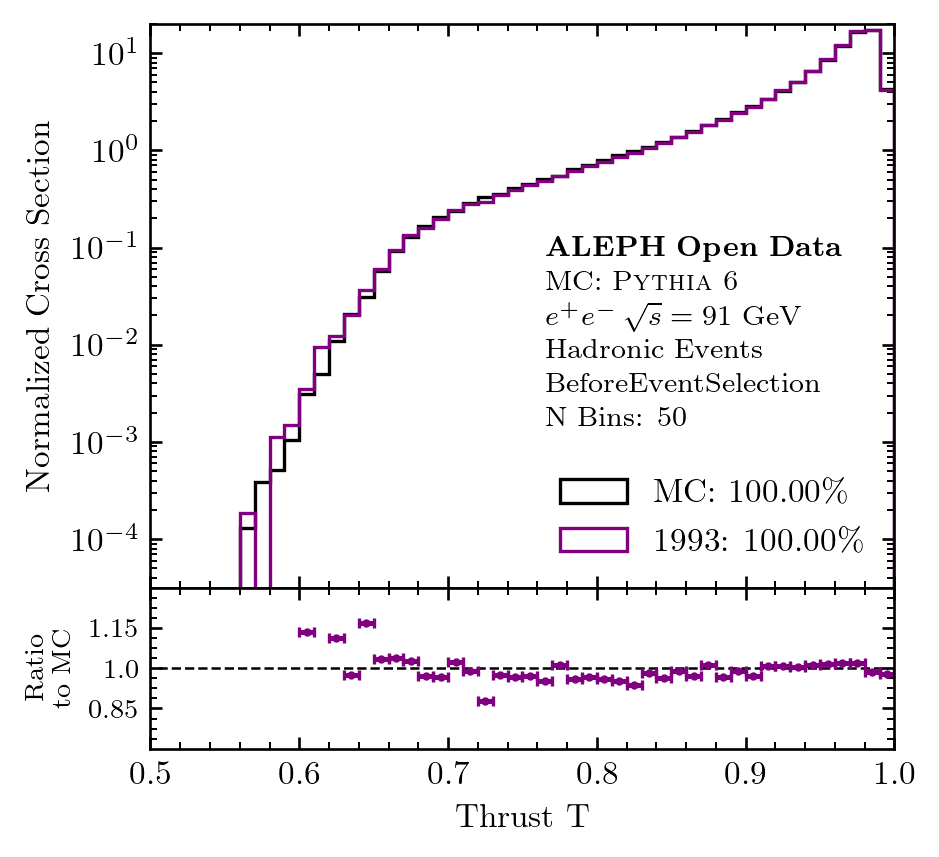

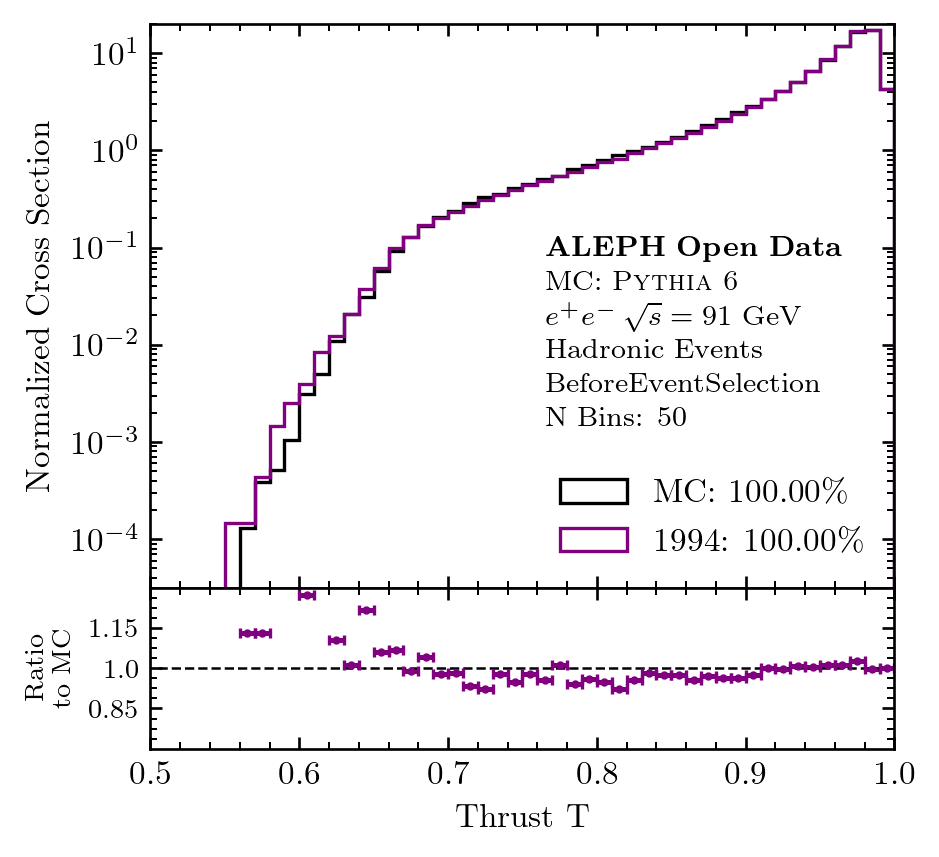

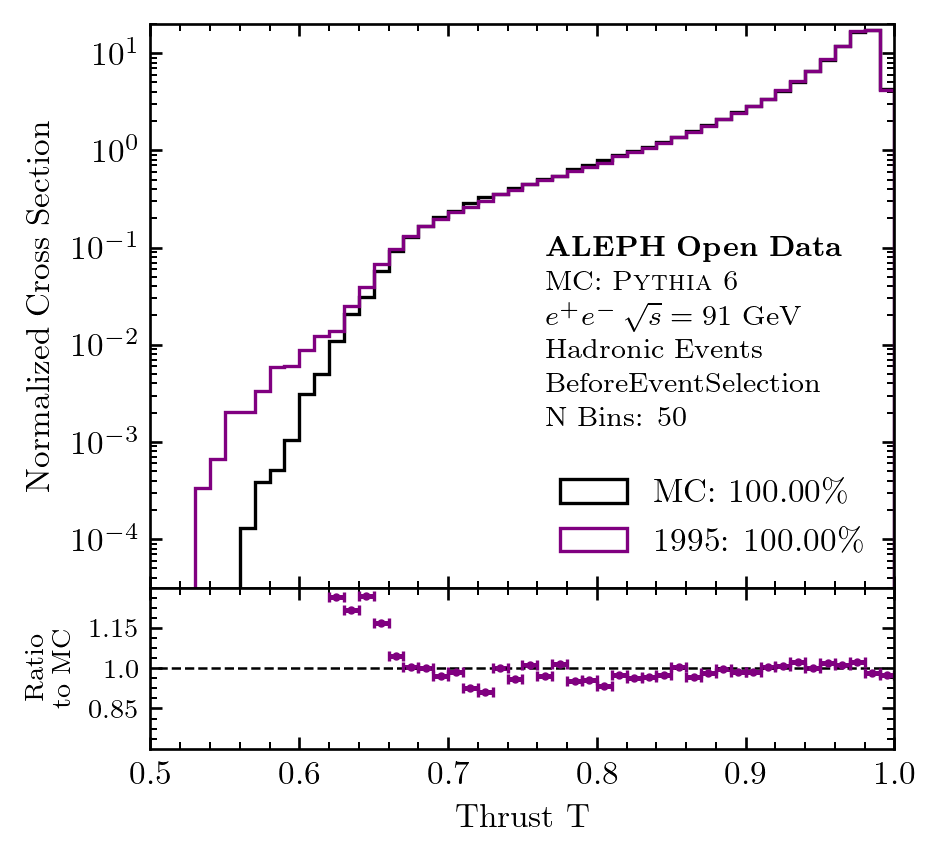

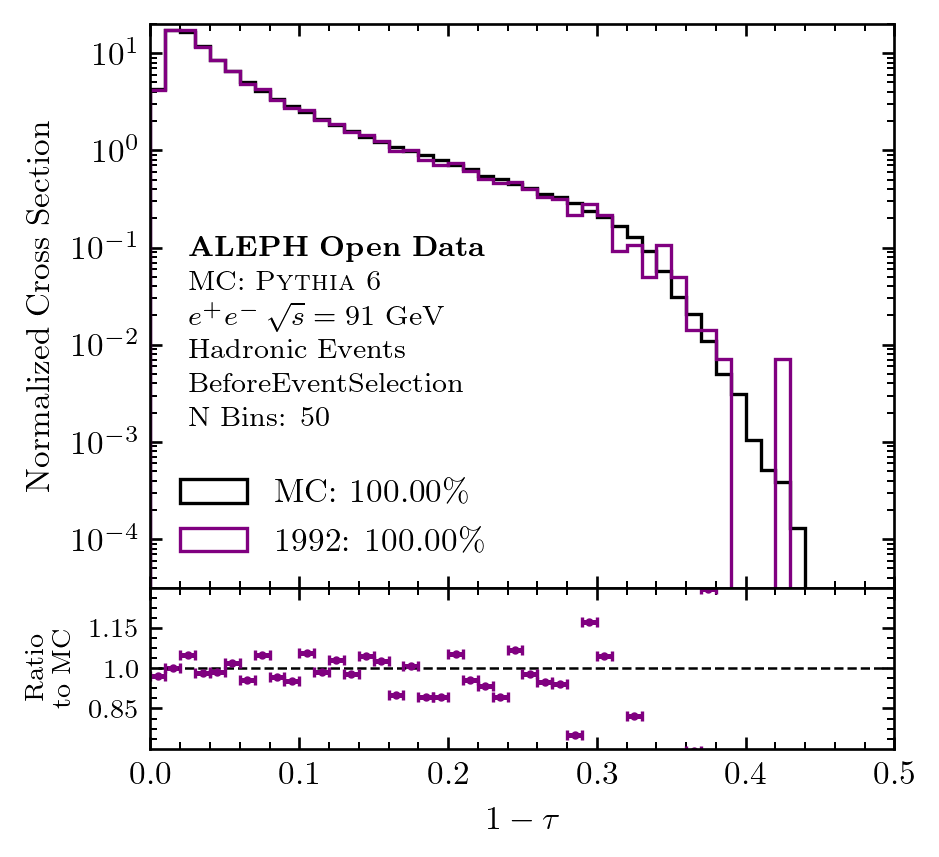

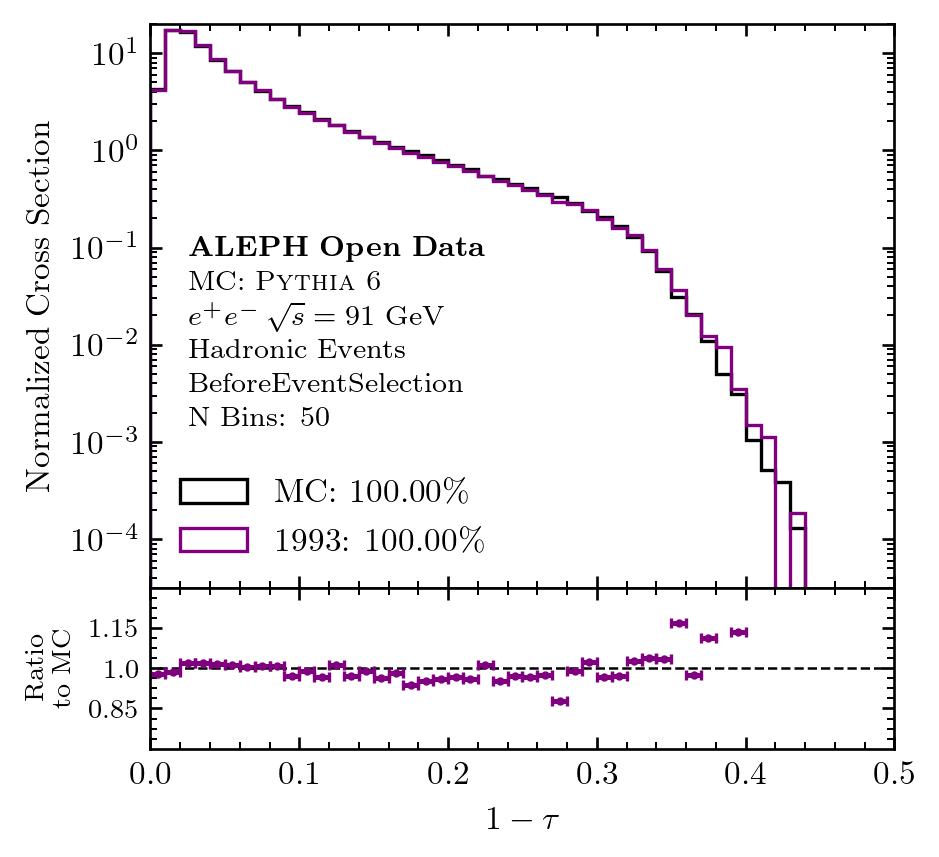

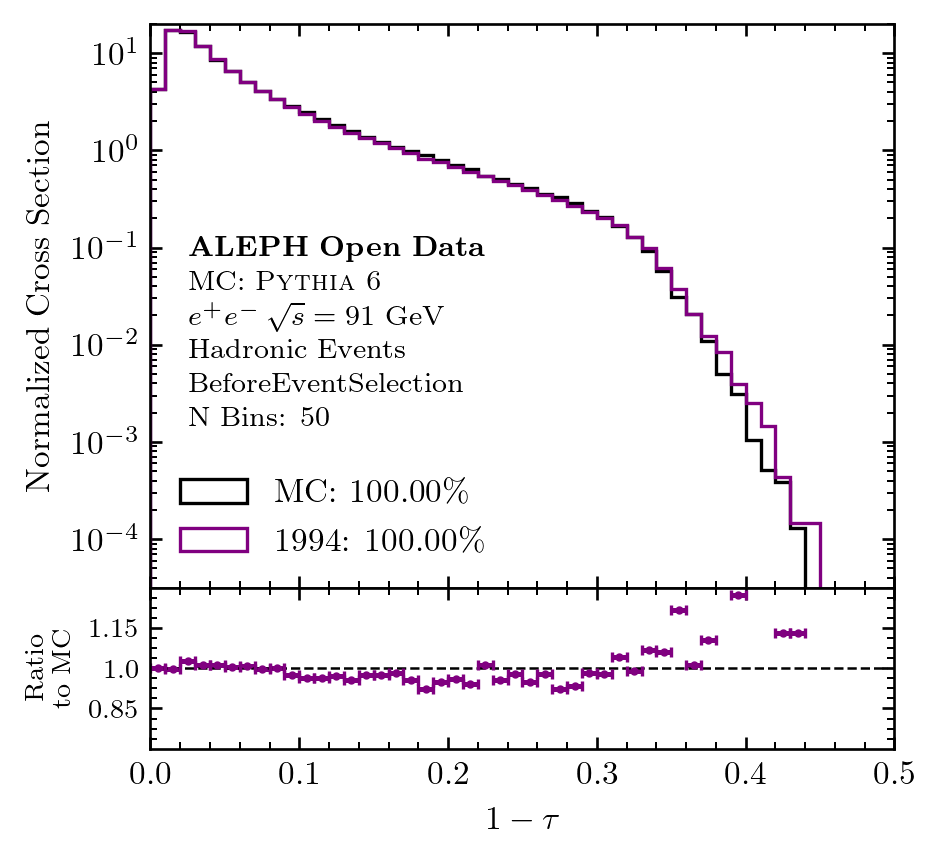

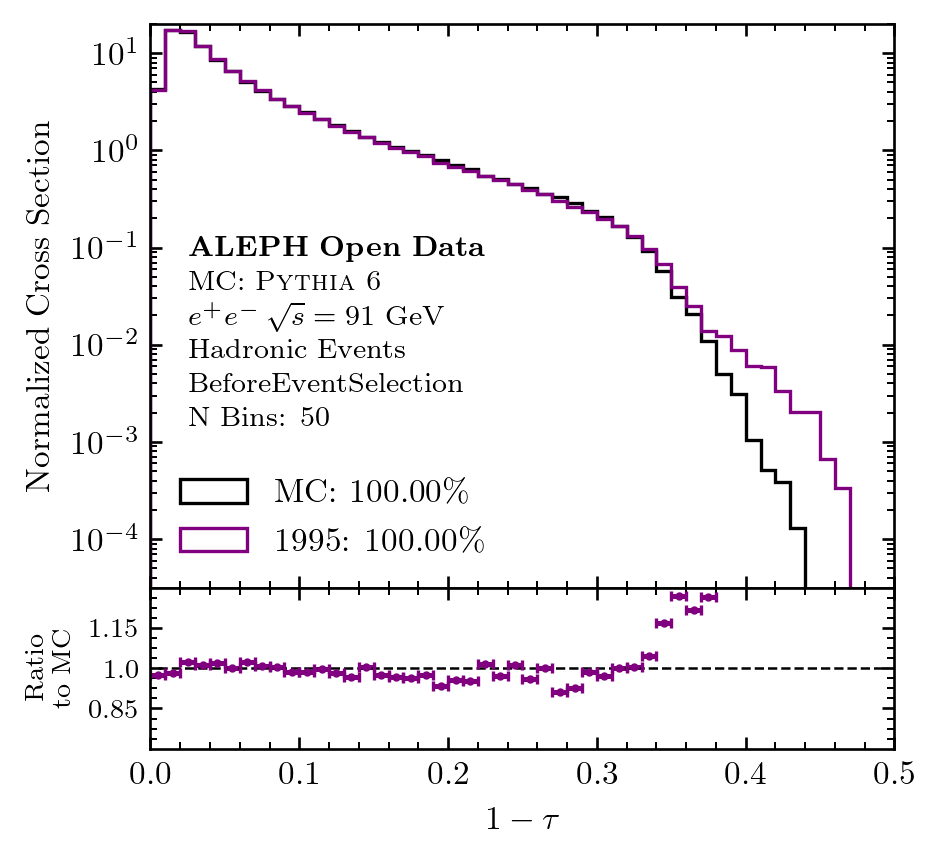

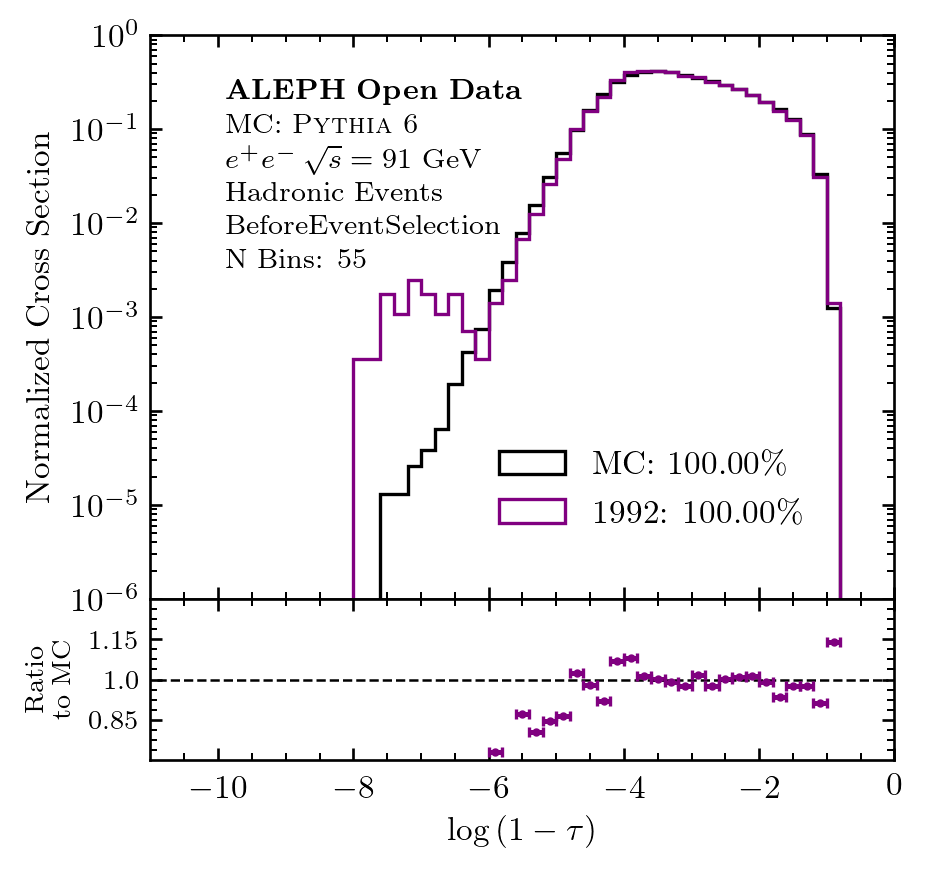

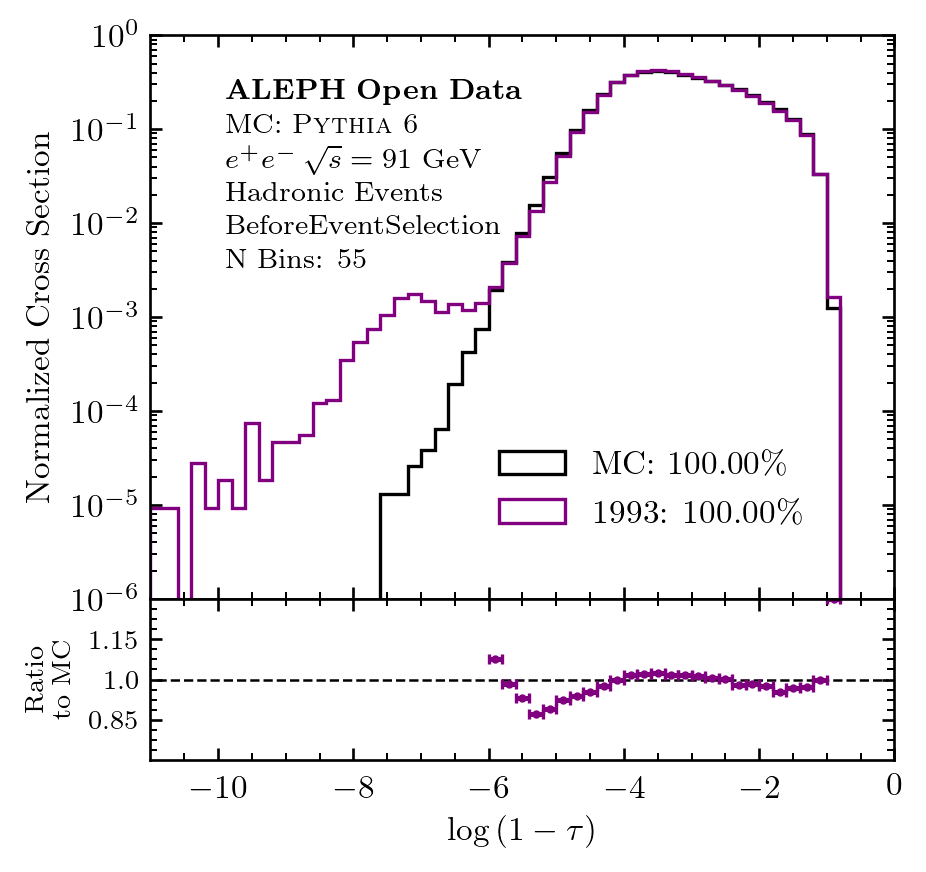

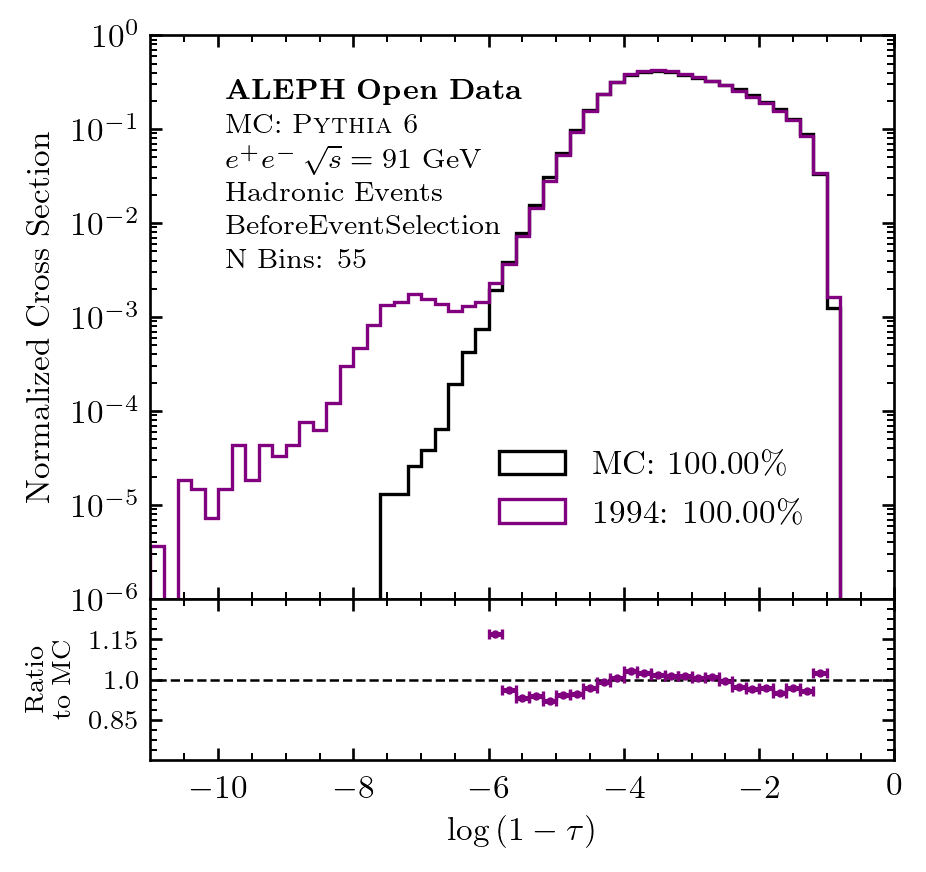

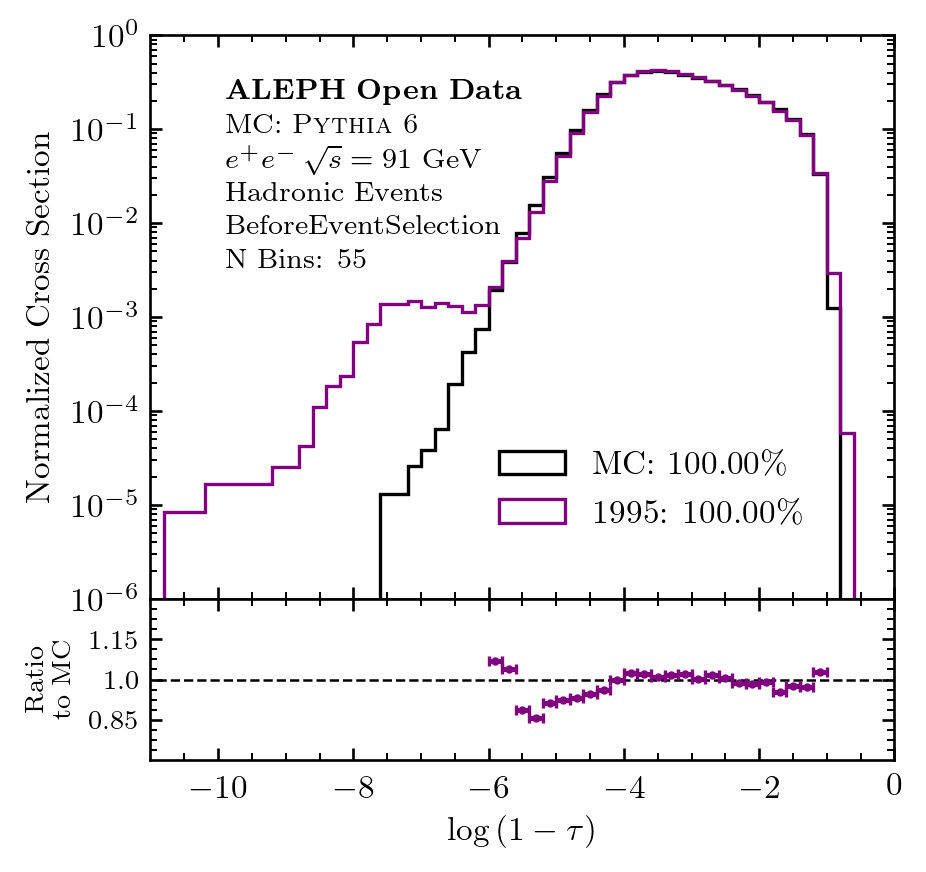

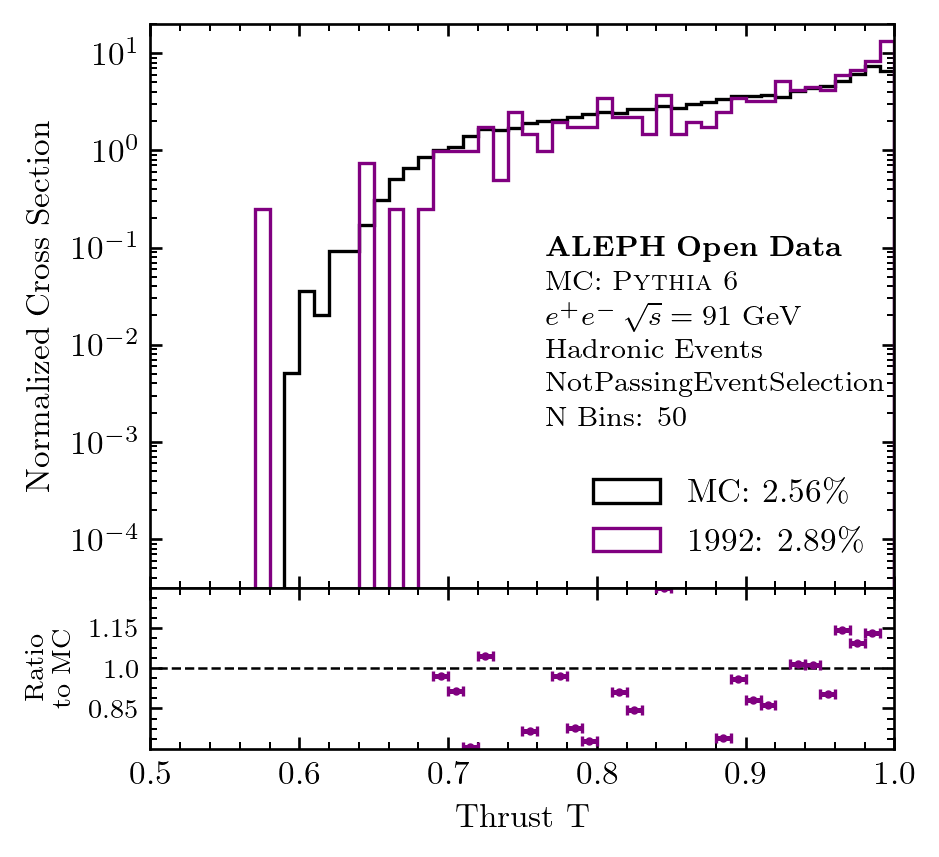

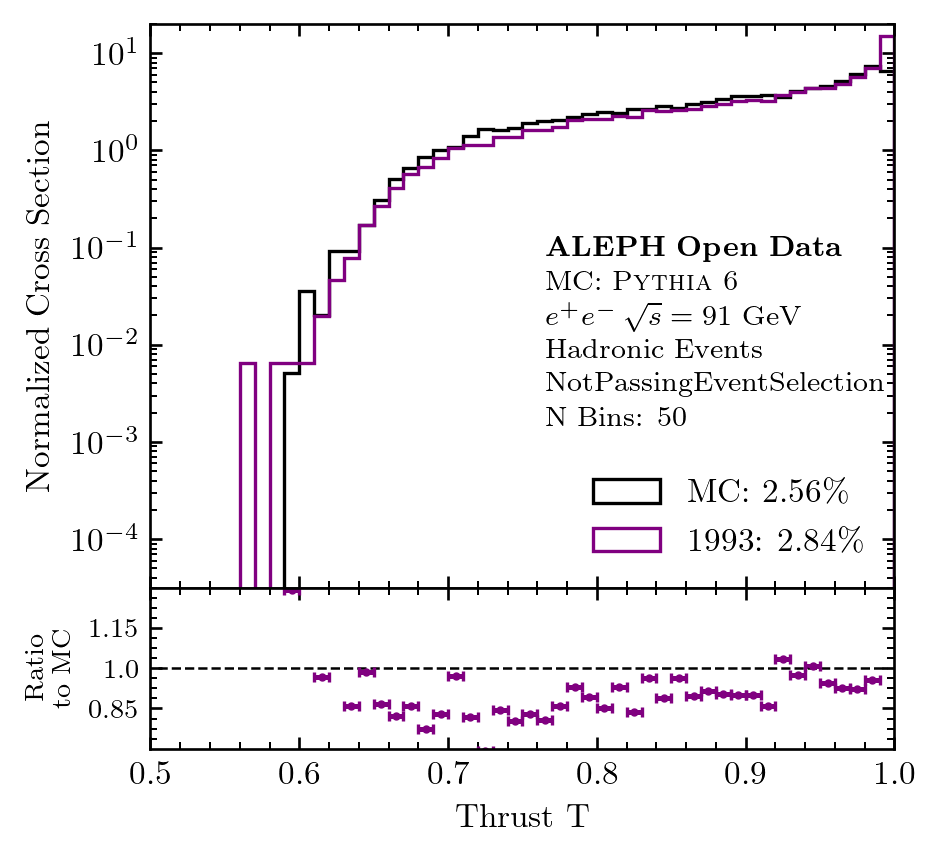

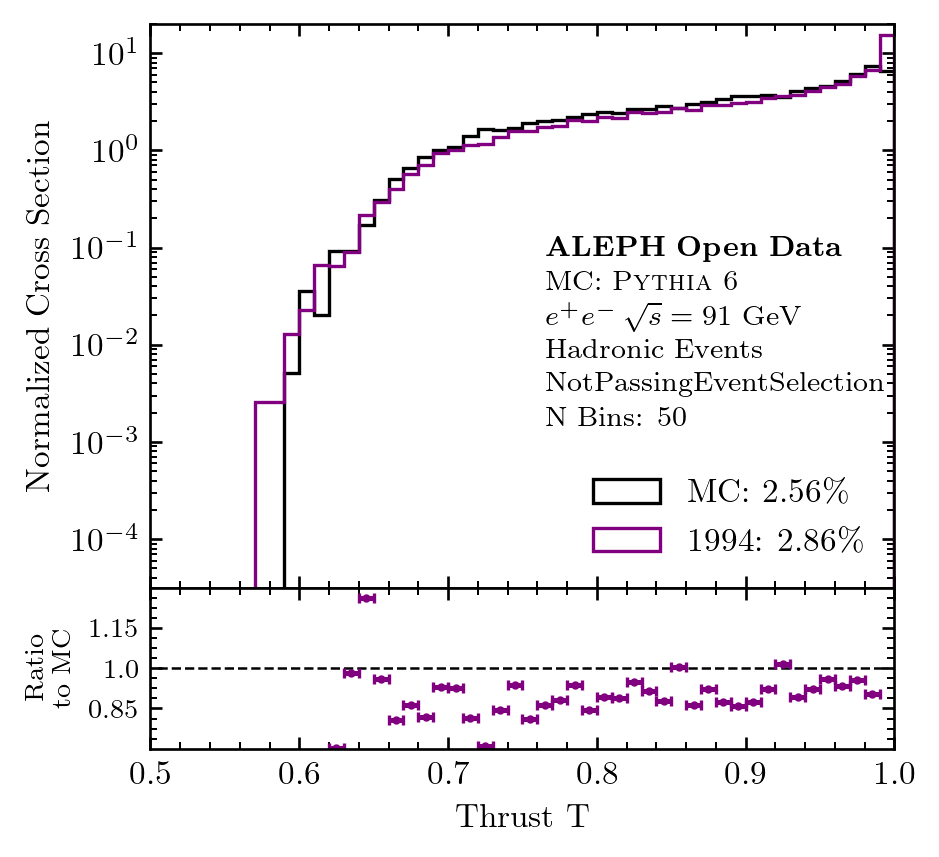

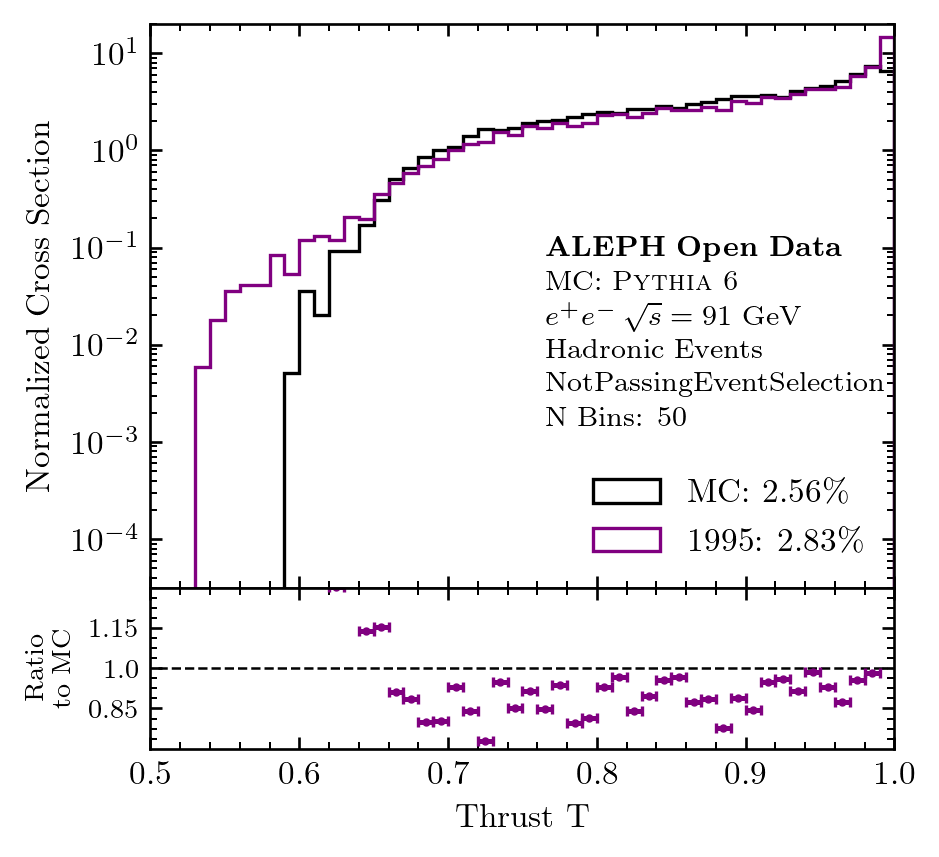

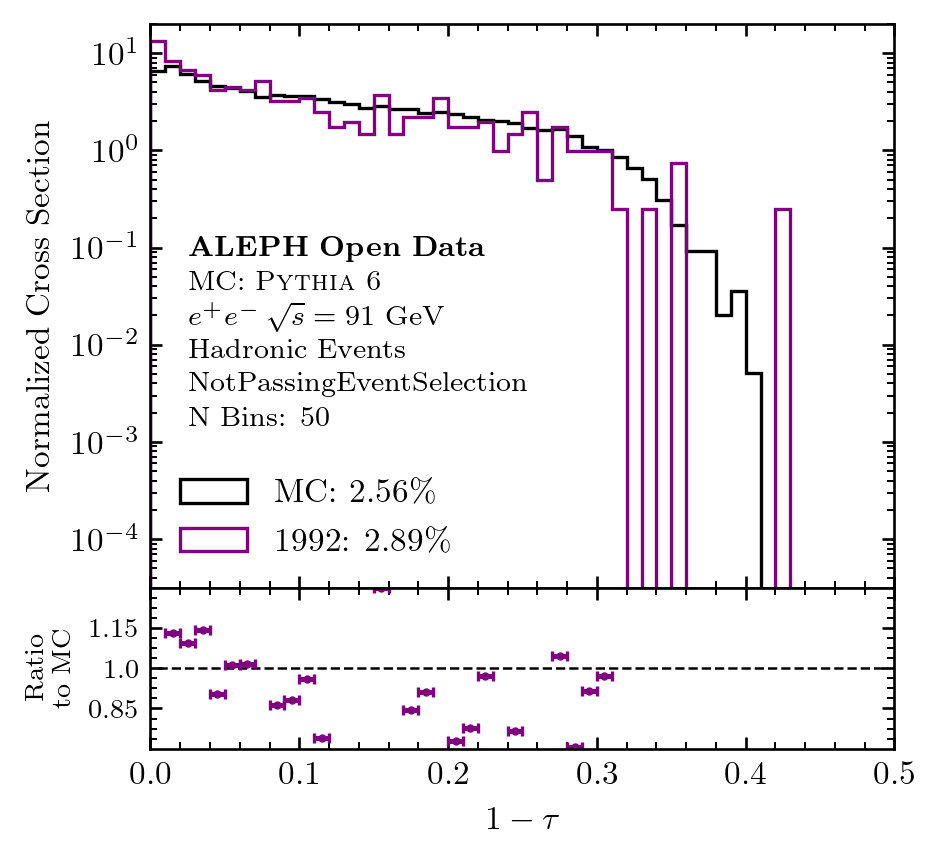

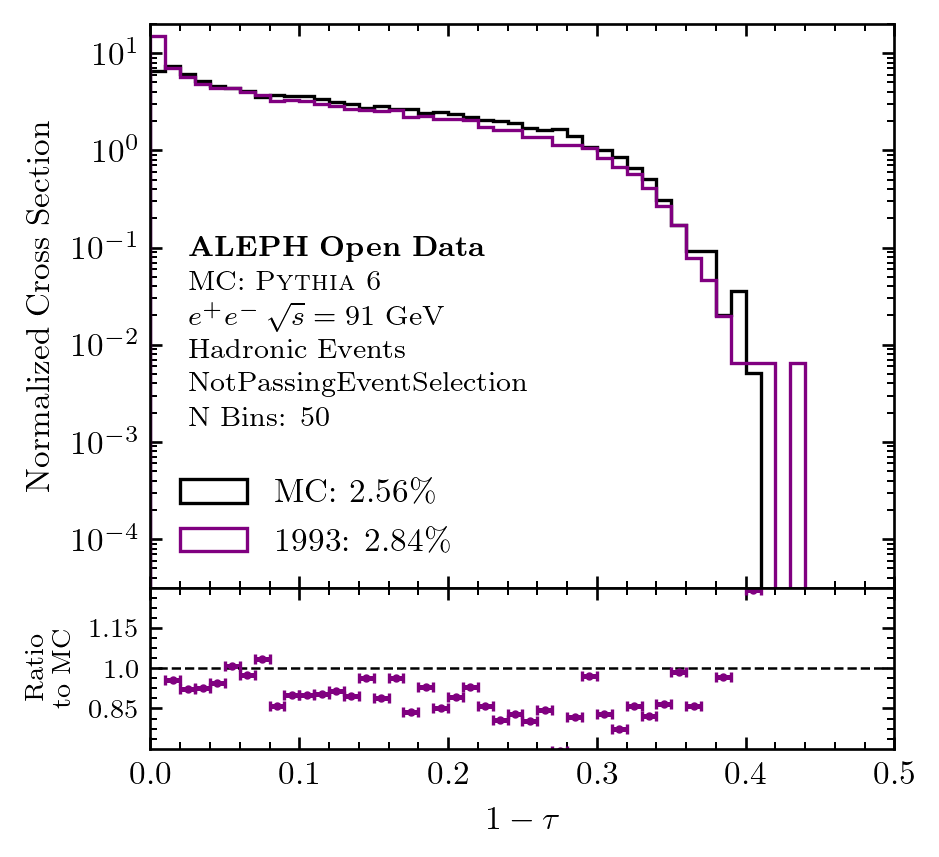

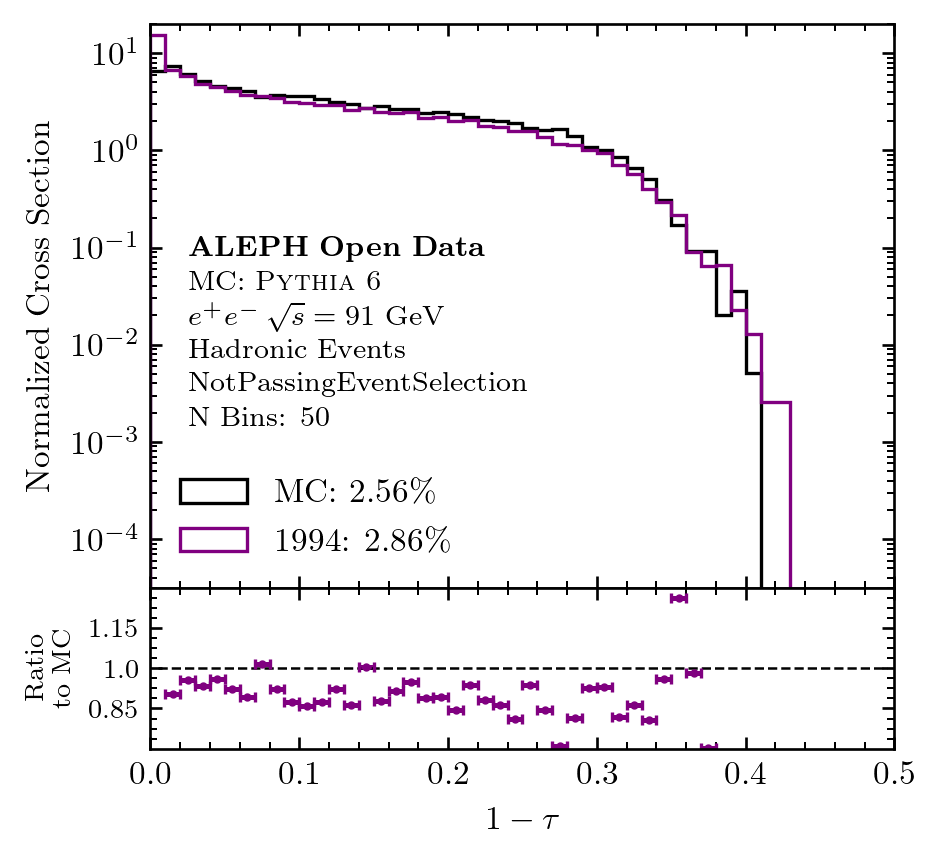

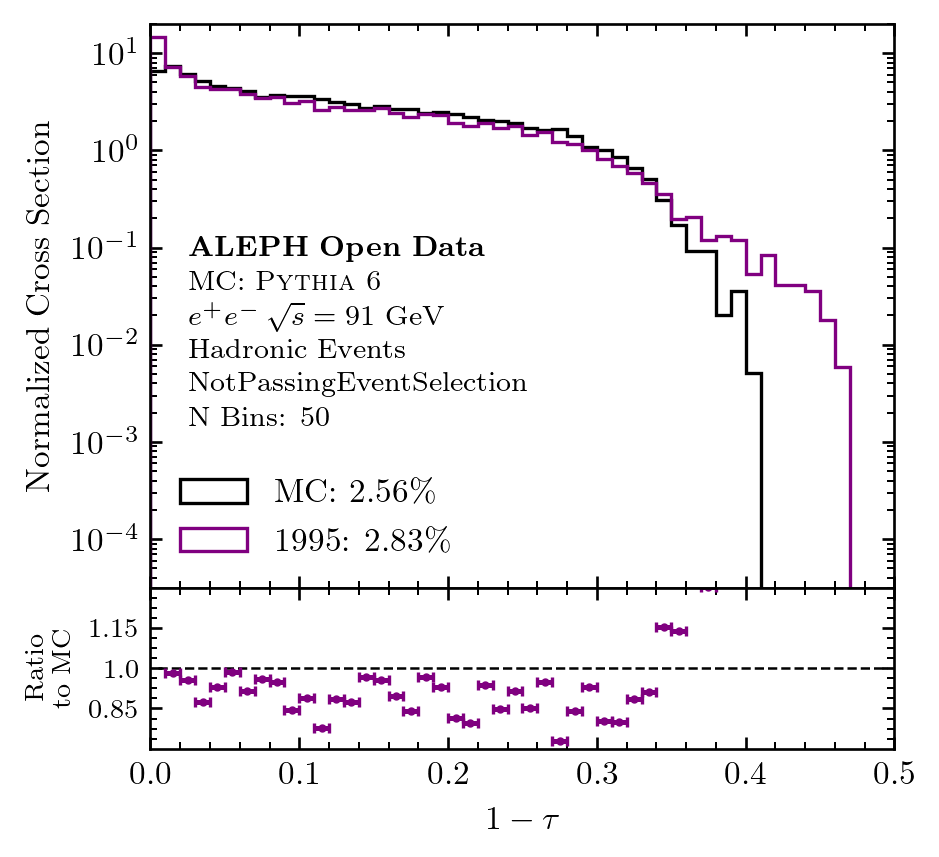

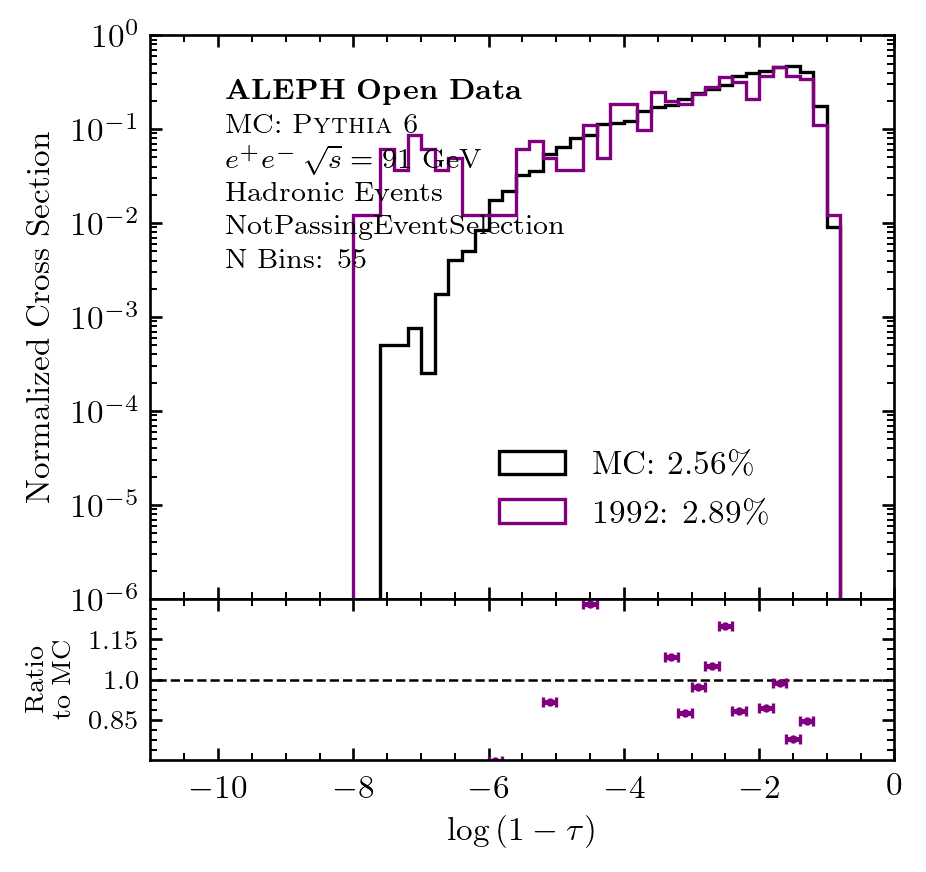

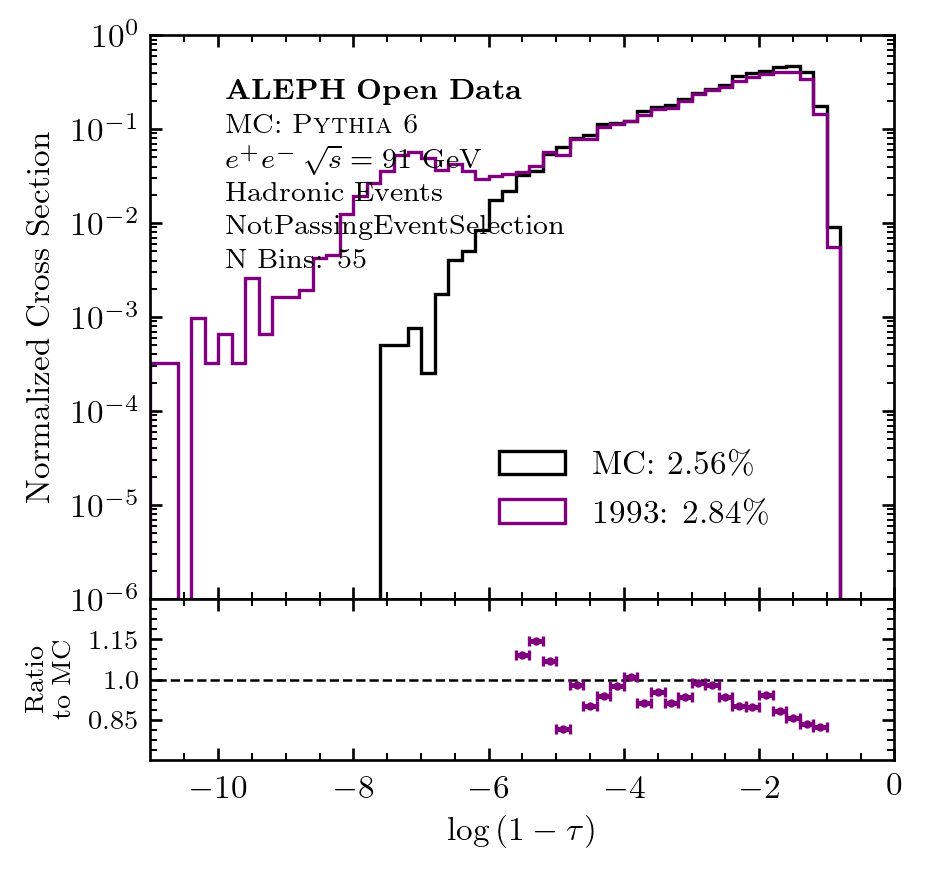

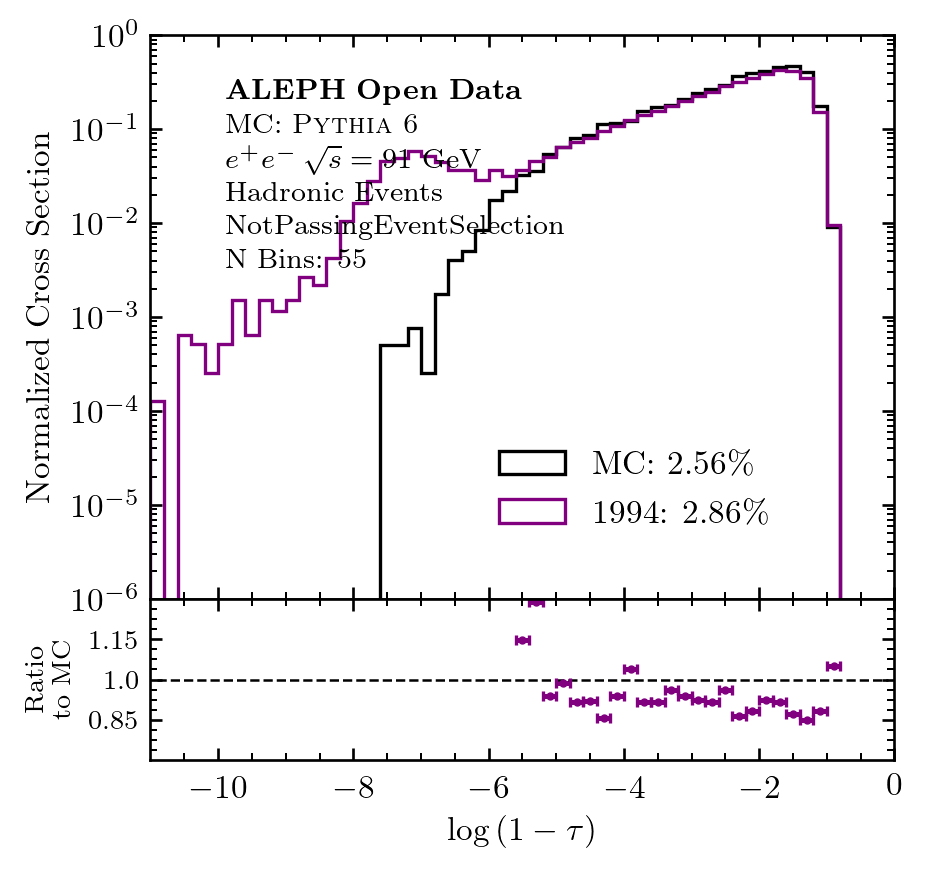

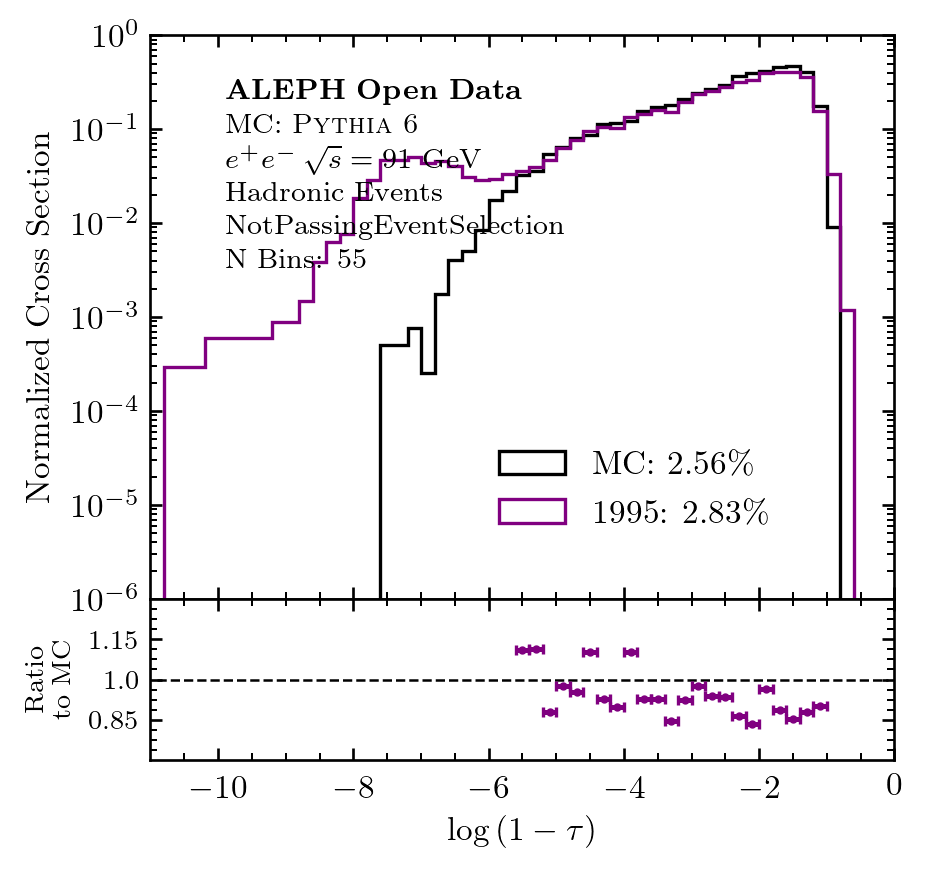

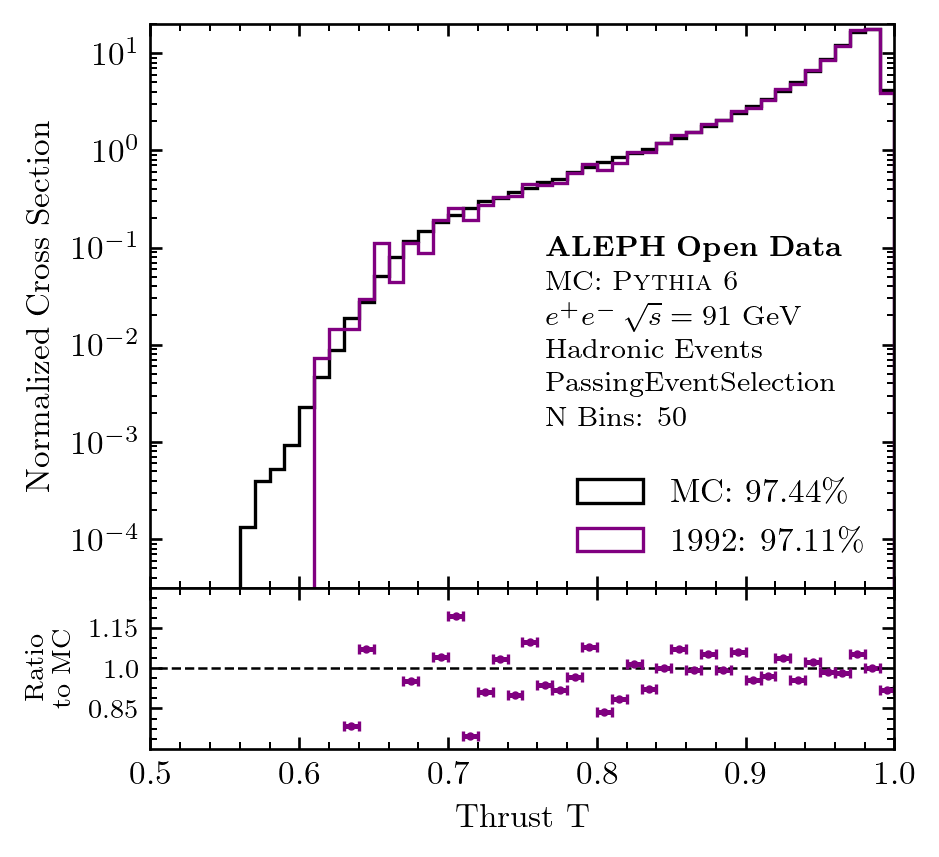

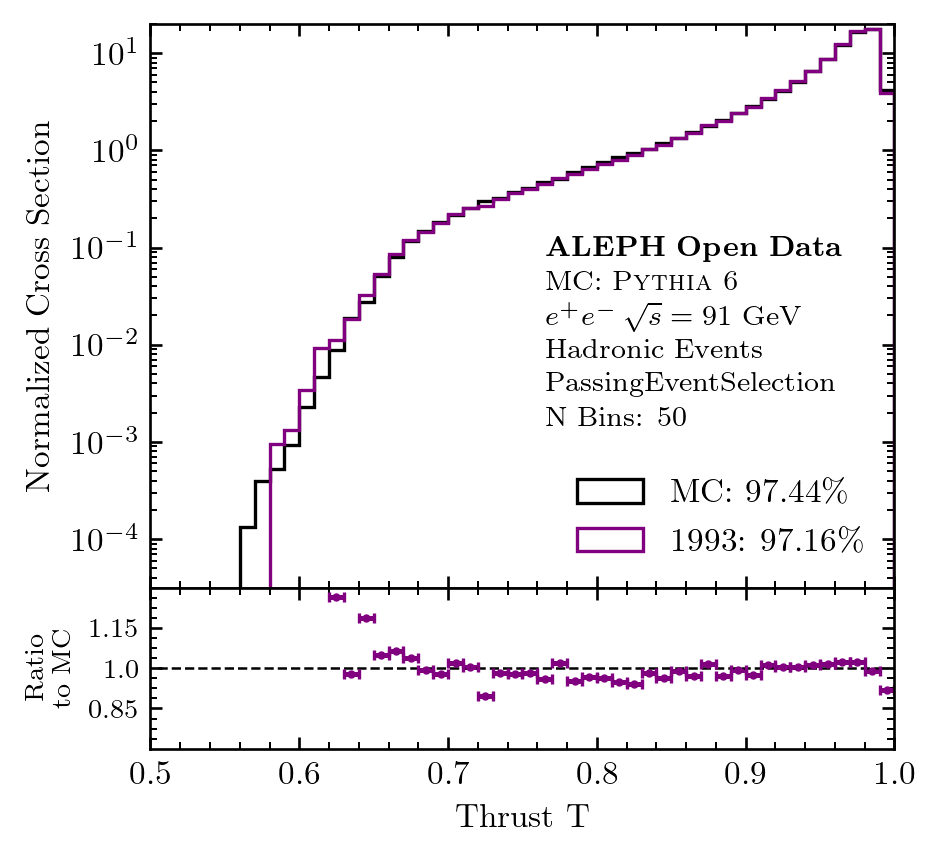

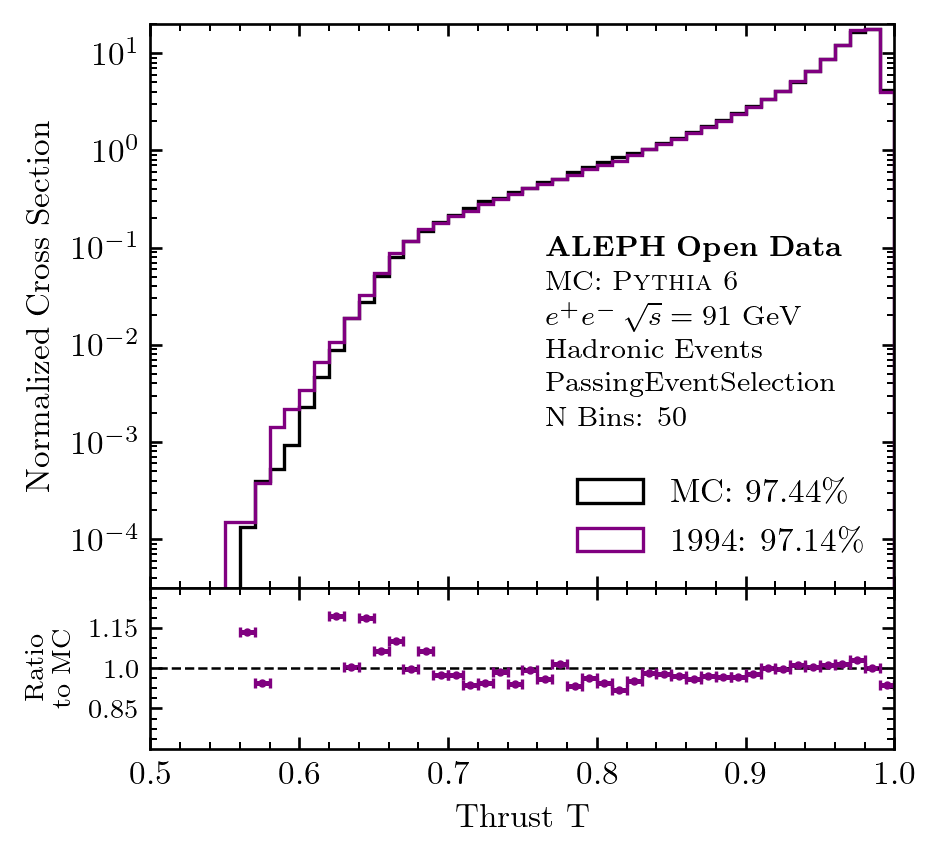

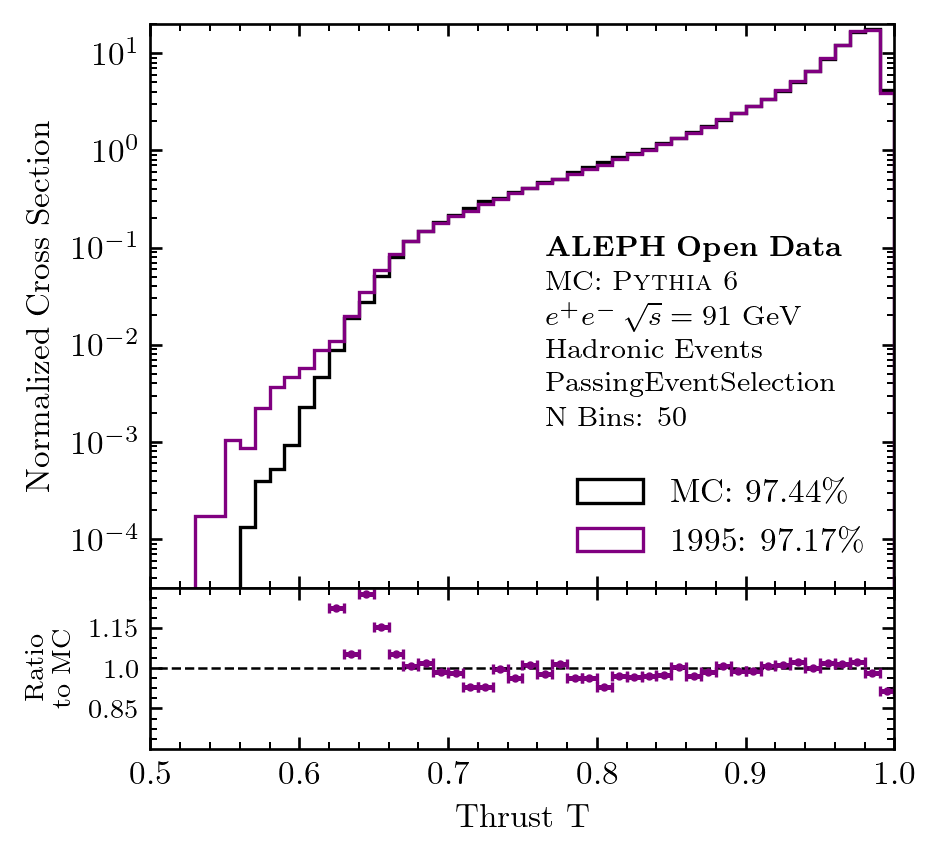

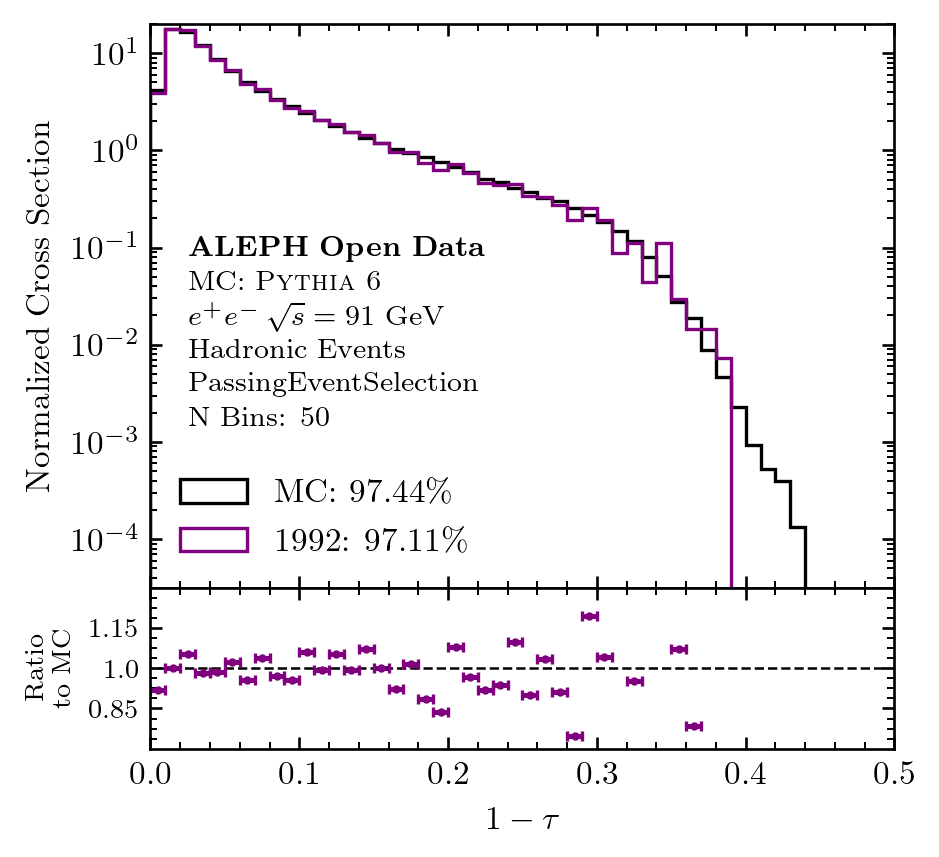

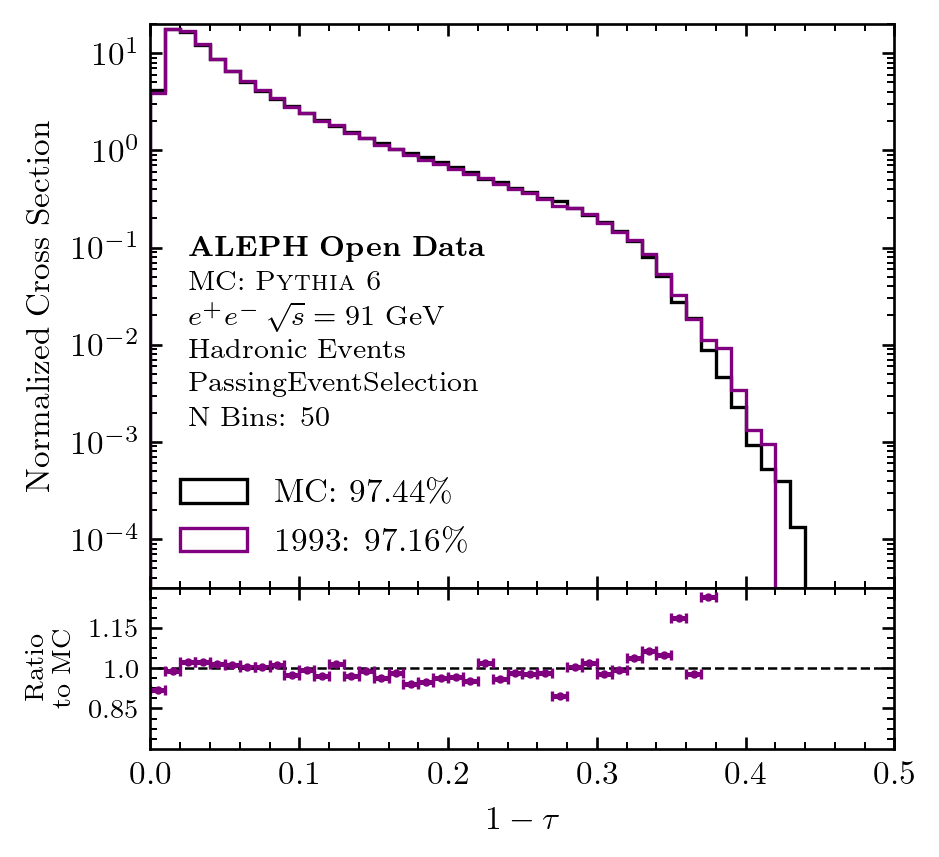

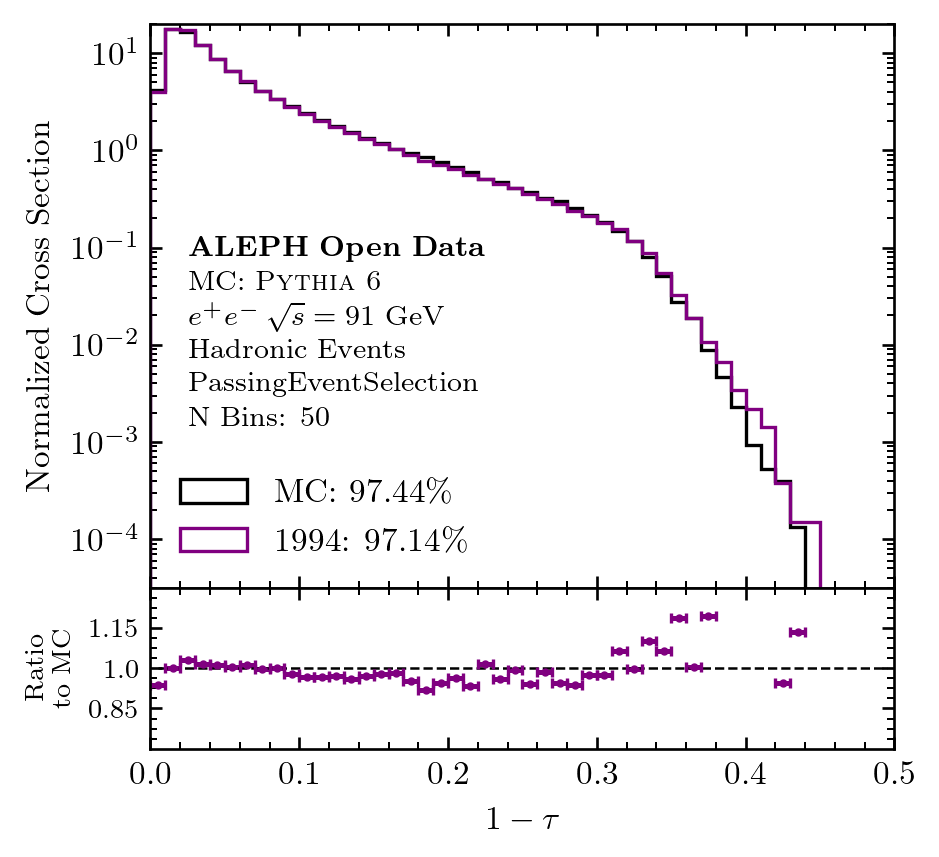

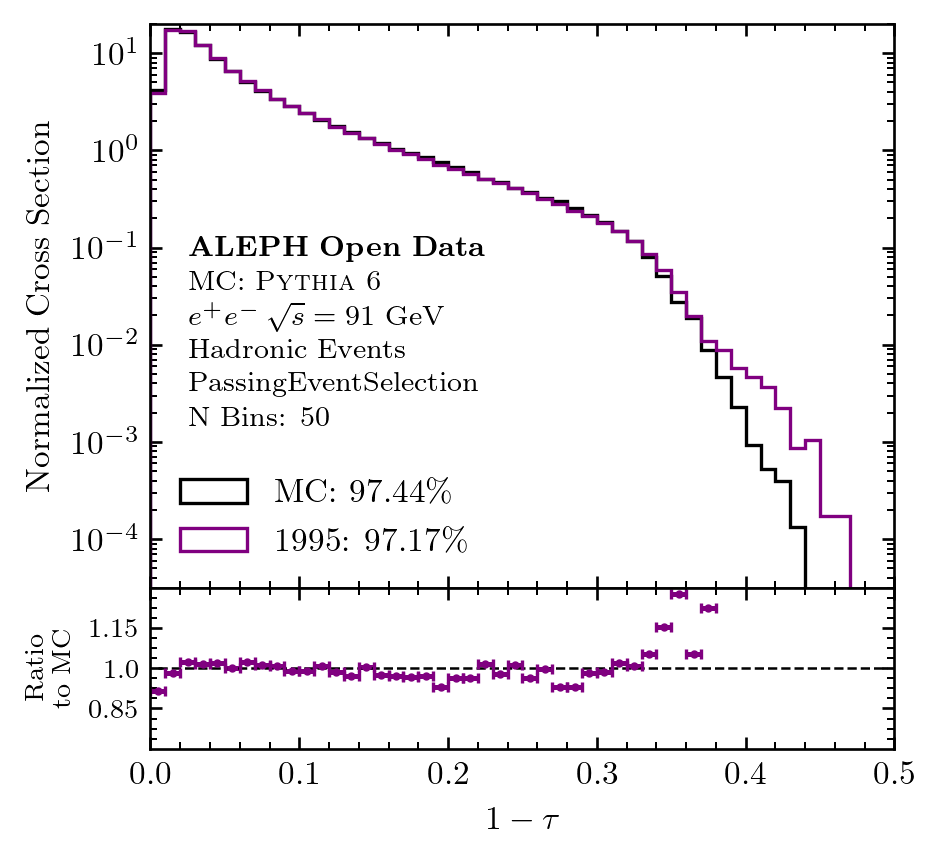

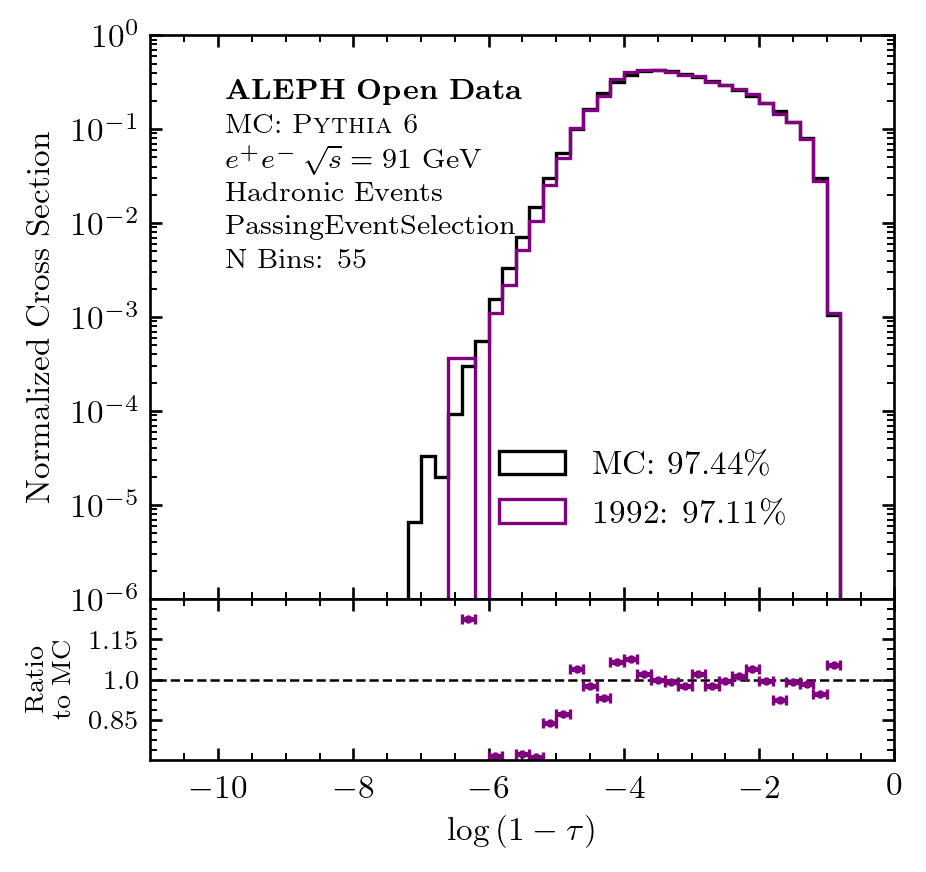

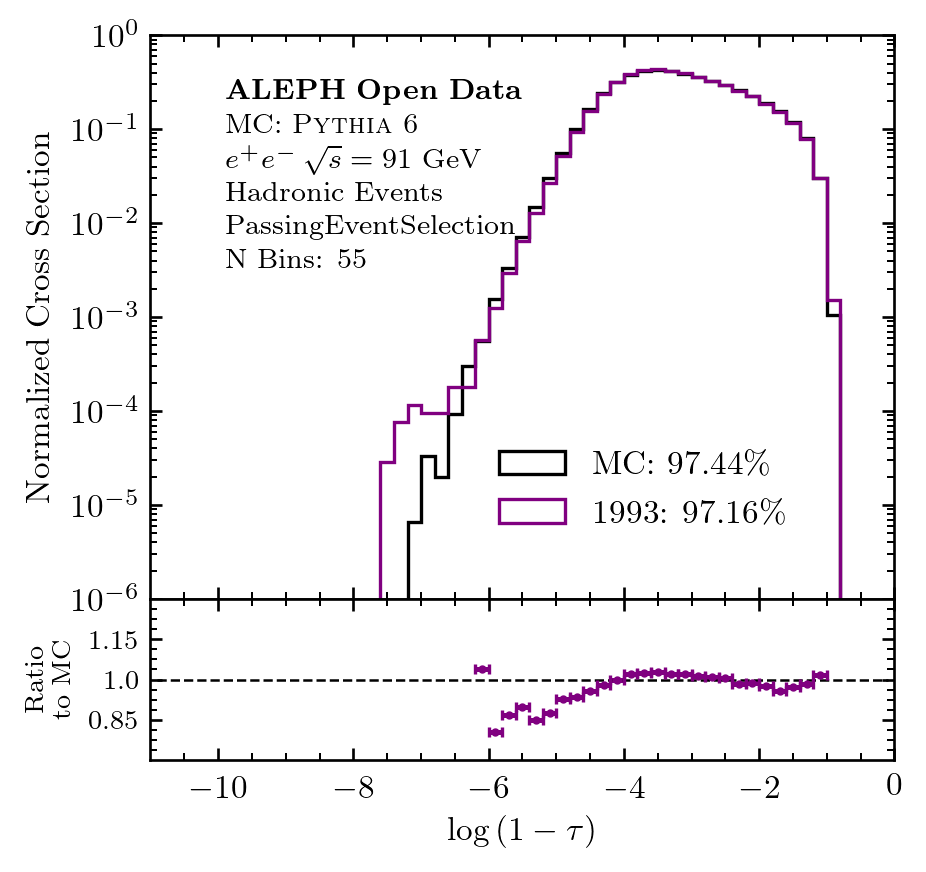

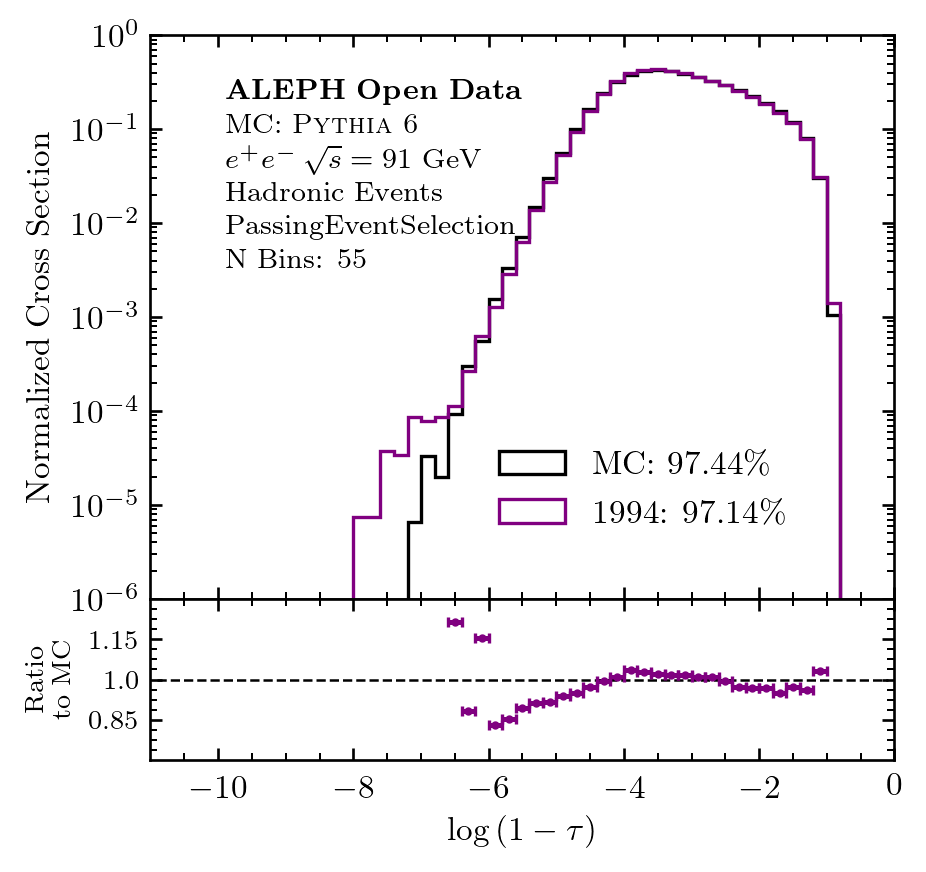

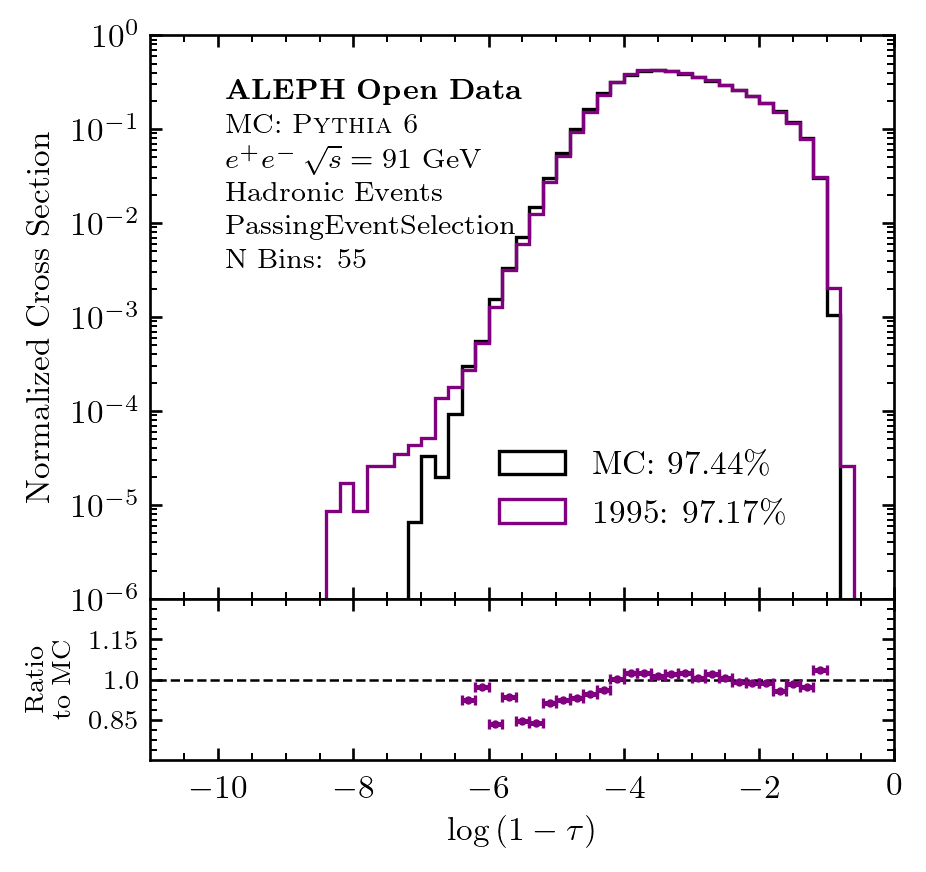

In [104]:
# Plot the detector data
iRef = 4 # index of 1994 MC data
#for key in detectorDists.keys():
NBefore = [float(len(detectorDists['Thrust_BeforeEventSelection'][i])) for i in range(5)]

for sel in ['BeforeEventSelection','NotPassingEventSelection','PassingEventSelection']:
    for obkey, ob in obs.items():
        # plot the LEP years
        for year in range(len(years)):   
            # get the styled axes on which to plot
            fig, [ax0, ax1] = modplot.axes(**ob)
            
            # plot the reference MC level distribution
            perc = len(detectorDists[obkey+'_'+sel][iRef])/NBefore[iRef] *100
            histRef, binsRef, patchesRef = ax0.hist(detectorDists[obkey+'_'+sel][iRef], ob['bins_det'], color=colors[iRef],**hist_style, label=r'MC: {:0.2f}\%'.format(perc))
        
            perc = len(detectorDists[obkey+'_'+sel][year])/NBefore[year] * 100
            hist, bins, patches = ax0.hist(detectorDists[obkey+'_'+sel][year], ob['bins_det'], color=colors[year],**hist_style, label=r'{}: {:0.2f}\%'.format(years[year],perc))
            # Plot the Ratios of the Detector level distributions to 1994 year
            ratio = hist/(histRef+10**-50)
            # errors not yet calculated
            ratio_errs = [0]*len(hist)
            ax1.plot([np.min(ob['midbins_det']), np.max(ob['midbins_det'])], [1, 1], '--', color='black', lw=0.75)
            ax1.errorbar(ob['midbins_det'], ratio, xerr=ob['binwidth_det']/2, yerr=ratio_errs, color=colors[year], **modplot.style('errorbar'))
            
            ax0.set_yscale('log')
            ax1.set_ylabel("Ratio \n to MC".format(years[year]))
            
            loc, ncol = ob['legend_loc'], 1
            order = range(2)
            modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

            # stamp to put on the plots
        
            modplot.stamp(*ob['stamp_xy'], delta_y=0.06, ax=ax0,
                          line_0=r'\textbf{ALEPH Open Data}',
                          line_1=r'MC: \textsc{Pythia 6}',
                          line_2=r'$e^+e^-\,\sqrt{s}=91$ GeV',
                          line_3='Hadronic Events',
                          line_4=sel,
                          line_5='N Bins: %i'%ob['nbins_det']) 

            # save plot (by default in the same directory as this notebook).
            # If running on binder, the plot can be accessed by first going to the jupyter file browser
            # (which itself can be accessed by copying the URL of this notebook and removing the name of the notebook
            # after the final "/"), selecting the square next to the name of the plot, and clicking "Download".
            path = os.path.join(os.getcwd(),'ThrustStudies')
            figname = '{}_DetectorLevel_Ratio{}toPythia6MC1994'.format(obkey+'_'+sel,years[year])
            #fig.savefig(os.path.join(path,figname), bbox_inches='tight')
            modplot.save(fig, figname, add_watermark=True, tx=221.5, ty=251.5, plots_dir='ThrustStudies')
            #plt.close(fig)
            plt.show()

In [105]:
!tar -czvf ThrustStudies.zip ThrustStudies

ThrustStudies/
ThrustStudies/1-Thrust_PassingEventSelection_DetectorLevel_Ratio1994toPythia6MC1994.pdf
ThrustStudies/Thrust_BeforeEventSelection_DetectorLevel_Ratio1993toPythia6MC1994_logo.pdf
ThrustStudies/log(1-Thrust)_PassingEventSelection_DetectorLevel_Ratio1992toPythia6MC1994.pdf
ThrustStudies/1-Thrust_PassingEventSelection_DetectorLevel_Ratio1992toPythia6MC1994_logo.pdf
ThrustStudies/1-Thrust_BeforeEventSelection_DetectorLevel_Ratio1992toPythia6MC1994_logo.pdf
ThrustStudies/1-Thrust_NotPassingEventSelection_DetectorLevel_Ratio1993toPythia6MC1994_logo.pdf
ThrustStudies/log(1-Thrust)_NotPassingEventSelection_DetectorLevel_Ratio1992toPythia6MC1994_logo.pdf
ThrustStudies/Thrust_BeforeEventSelection_DetectorLevel_Ratio1994toPythia6MC1994_logo.pdf
ThrustStudies/Thrust_PassingEventSelection_DetectorLevel_Ratio1992toPythia6MC1994_logo.pdf
ThrustStudies/log(1-Thrust)_PassingEventSelection_DetectorLevel_Ratio1995toPythia6MC1994_logo.pdf
ThrustStudies/log(1-Thrust)_NotPassingEventSelection_

# Unfold each of the distributions

In [11]:
print(os.path.isdir('ThrustStudies'))
open(os.path.join('ThrustStudies',figname+'.pdf'))

True


<_io.TextIOWrapper name='ThrustStudies/log(1-Thrust)_DetectorLevel_Ratio1995toPythia6MC1994.pdf' mode='r' encoding='UTF-8'>